### Setup

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
from sklearn.metrics import brier_score_loss

In [80]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
weights = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/curric-data-001-data-sets/master/ideal-weight/ideal_weight.csv')

### Take apostrophes out of column names

In [8]:
weights.columns = (x.replace("'", "") for x in weights.columns)
weights.head()

,id,sex,actual,ideal,diff
0,0,'Male',215,190,25
1,1,'Female',155,135,20
2,2,'Male',195,155,40
3,3,'Female',145,130,15
4,4,'Female',110,100,10


### Actual vs Ideal weight distributions

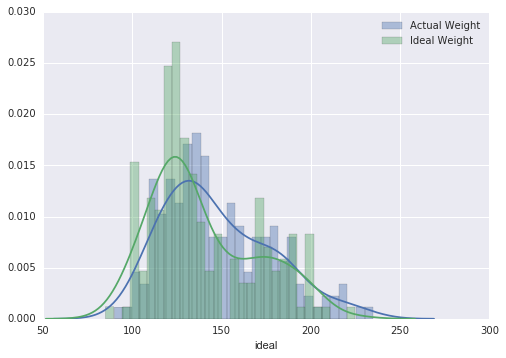

In [29]:
#plt.figure()
#weights[['actual','ideal']].plot.hist(alpha = 0.3, figsize=(10, 8), bins = 30)
sns.distplot(weights['actual'], label = 'Actual Weight', bins = 30)
sns.distplot(weights['ideal'], label = 'Ideal Weight', bins = 30)
plt.legend()
#plt.show()

### Difference between actual and ideal weight

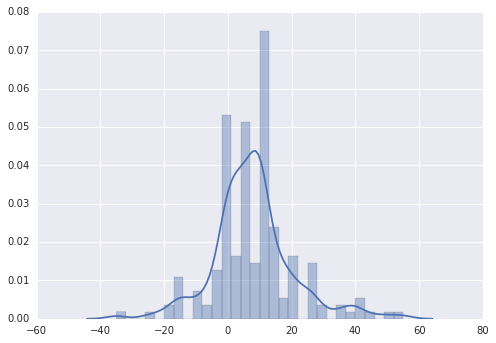

In [31]:
sns.distplot(weights['actual'] - weights['ideal'], label = 'Actual Weight', bins = 30)

### Create gender as a categorical variable (Male = 0, Female = 1)

In [37]:
weights['gender'] = weights['sex'].map(lambda x: 0 if x == "'Male'" else 1)
weights.head()

,id,sex,actual,ideal,diff,gender
0,0,'Male',215,190,25,0
1,1,'Female',155,135,20,1
2,2,'Male',195,155,40,0
3,3,'Female',145,130,15,1
4,4,'Female',110,100,10,1


### Much more Females than Males in the data

In [41]:
weights.groupby('gender').id.count()

gender
0     63
1    119
Name: id, dtype: int64

### Create training and test sets to predict gender based on actual, ideal, and diff weights

In [42]:
y = np.matrix(weights['gender']).transpose()
x1 = np.matrix(weights['actual']).transpose()
x2 = np.matrix(weights['ideal']).transpose()
x3 = np.matrix(weights['diff']).transpose()

In [44]:
x = np.column_stack([x1,x2,x3])
X = sm.add_constant(x)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [83]:
clf = GaussianNB()
clf.fit(X_train, y_train)
prob_pos_clf = clf.predict_proba(X_test)[:, 1]
pred_clf = clf.predict(X_test)
pred_clf

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [76]:
y_test.transpose()

matrix([[1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1]])

### Good Brier score loss

In [58]:
clf_score = brier_score_loss(y_test, prob_pos_clf)
print("Brier score loss: %1.3f" % clf_score)

Brier score loss: 0.045


### Accuracy approaching 90%

In [67]:
print("Naive Bayes Accuracy: %1.3f" % clf.score(X_test, y_test))

Naive Bayes Accuracy: 0.895


In [78]:
X_test

array([[   1.,  126.,  120.,    6.],
       [   1.,  122.,  120.,    2.],
       [   1.,  175.,  170.,    5.],
       [   1.,  160.,  175.,  -15.],
       [   1.,  125.,  115.,   10.],
       [   1.,  135.,  130.,    5.],
       [   1.,  160.,  150.,   10.],
       [   1.,  120.,  110.,   10.],
       [   1.,  125.,  112.,   13.],
       [   1.,  110.,  100.,   10.],
       [   1.,  125.,  120.,    5.],
       [   1.,  130.,  120.,   10.],
       [   1.,  185.,  185.,    0.],
       [   1.,  175.,  200.,  -25.],
       [   1.,  155.,  135.,   20.],
       [   1.,  180.,  165.,   15.],
       [   1.,  180.,  140.,   40.],
       [   1.,  168.,  163.,    5.],
       [   1.,  155.,  150.,    5.]])

### Actual 145, ideal 160, diff -15, predicted to be Male

In [81]:
clf.predict([1, 145, 160, -15])

array([0])

### Actual 160, ideal 145, diff 15, predicted to be Female

In [82]:
clf.predict([1, 160, 145, 15])

array([1])